In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import least_squares

F =0.096484
R =8.314e-3
T = 310.15
C0 = 1e-6
Ve = 1000;       
Vx = 1;

beta = 0.33
alfa = 4.49
k0 = 8.15e4

In [96]:
def Con2Int(C):
    k=1
    k0 = 8.15e4
    k1 = 5.16e4
    k2 = 1.01e6
    k3 = 3.91e12
    I = k0*C/(1+k1*C+k2*C**2+k3*C**3)
    return I

In [103]:


def equations(vars,I):
    Ce,dPsi = vars
    #----------------
    Cx = Ce*np.exp(F*dPsi/(R*T))
    I0 = Con2Int(C0)
    Ie = Con2Int(Ce)
    Ix = Con2Int(Cx)
    
    
    eq1 =(Ve*Ie + Vx*Ix + beta*k0*alfa *(Ce+Cx)/2 )/(Ve*I0) -I
    eq2 = Ve*Ce + Vx*Cx +alfa *(Ce+Cx)/2 - Ve*C0
#     print(eq1,eq2)
    return [eq1,10000*eq2]


In [113]:
# Int =[ 1, 0.9, 0.8, 0.7, 0.6, 0.5 , 0.4, 0.3,0.2,0.1]
all_data =pd.read_excel(r'C:\Users\zxiao\Google Drive\Xiao_Model\Experiments\R123_2020_Kidney\PTI_1ADP_all_data.xlsx')
Int =all_data['C_GM_Avg'].dropna()
print(Int[0:-1:25])

0      1.005112
25     1.002804
50     0.999815
75     0.709508
100    0.658696
125    0.651730
150    0.652617
175    0.661504
200    0.617307
225    0.604861
250    0.610275
275    0.611960
300    0.738745
325    0.799917
350    0.804819
375    0.786352
400    0.765302
425    0.700294
450    0.677023
475    0.659041
500    0.644899
525    0.642560
550    0.643238
575    0.642049
600    0.640041
625    0.640877
650    0.642758
675    0.645235
700    0.643804
725    0.881446
750    0.882723
775    0.884429
Name: C_GM_Avg, dtype: float64


In [109]:

ans =[]
for i in Int:
    
    I =i    
    res = least_squares(equations, (1e-8,160), bounds = ((0, 0), (1, 240)),args=(I,))
#     print(res.x)
    ans.append(res.x[1])

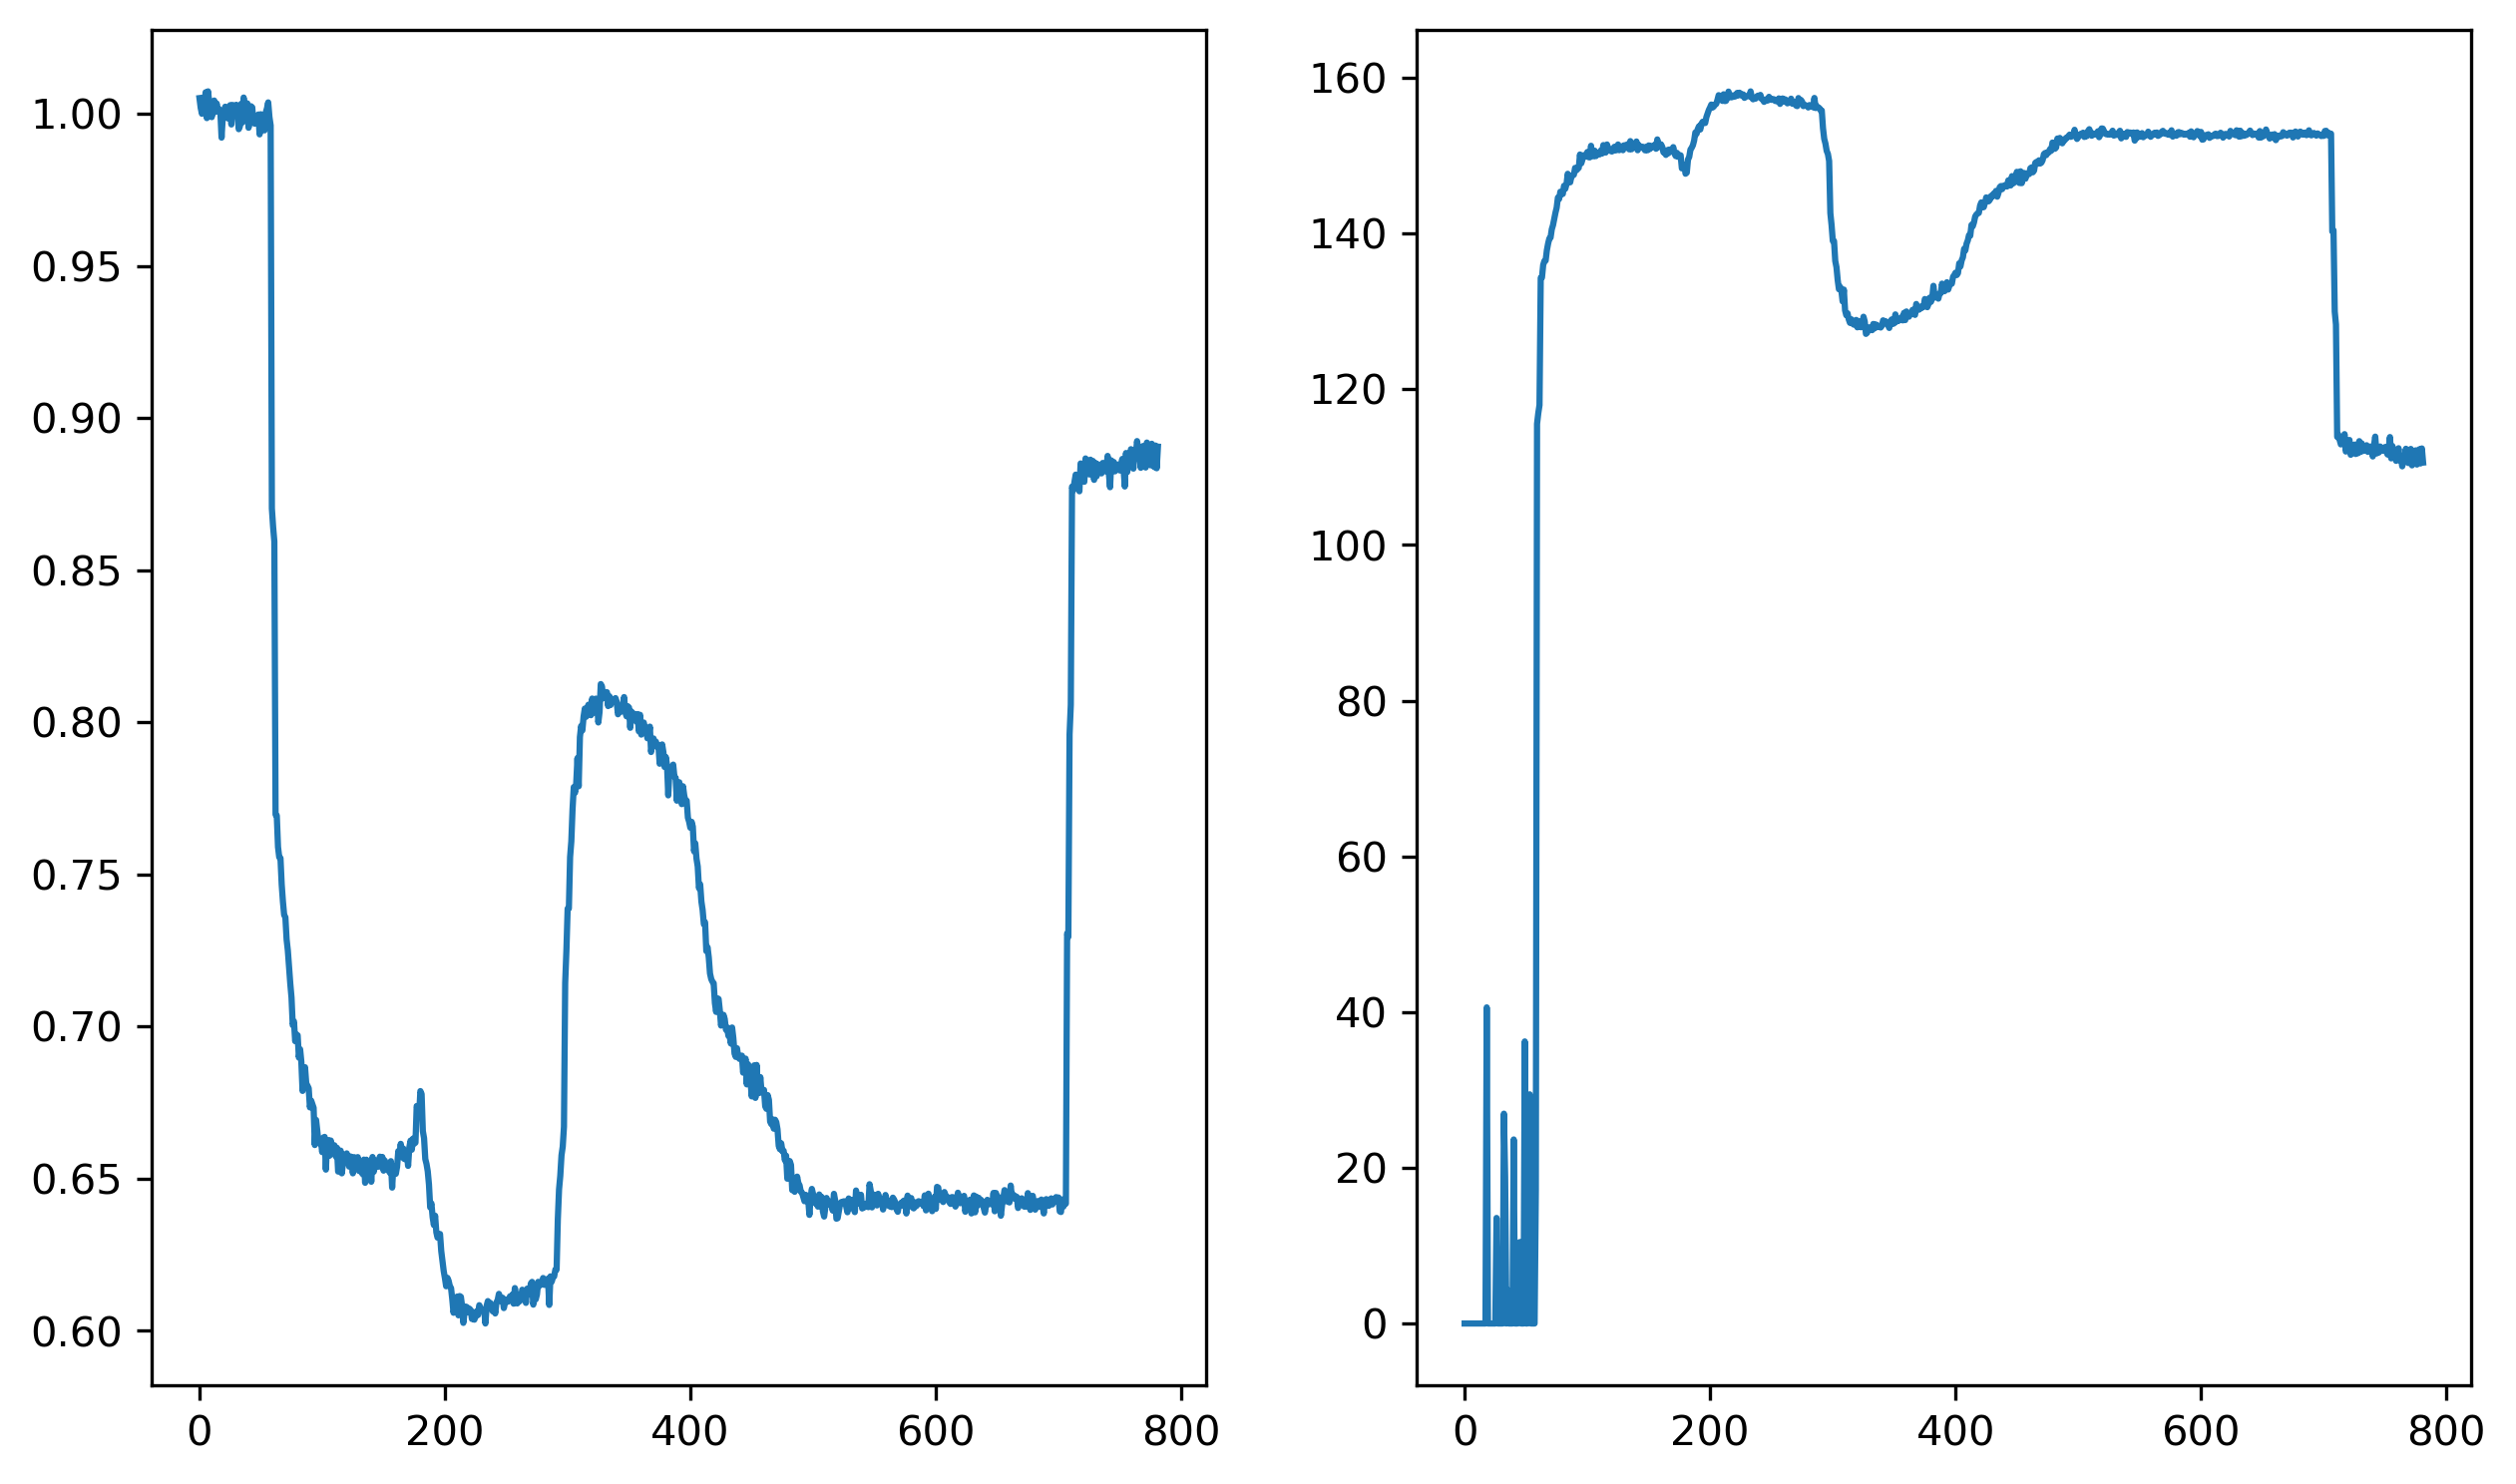

In [110]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=300)
ax1 =  plt.subplot(1, 2, 1)
ax1.plot(Int)
ax2 =  plt.subplot(1, 2, 2)
ax2.plot(ans)